In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
import time
from IPython import display

# Exploring probabilities with coin flips

We want to simulate flipping a coin some number of times (N) to see the number of heads we get.

In [3]:
nheads = 0
for i in range(0,500):
    if np.random.random() > 0.5:
        nheads += 1
print(nheads)

254


If we make this into a function, we can start to run multiple coin-flip trials.

#### What do you expect the ditribution of the number of heads to look like?

In [4]:
def get_nheads(nflips):
    nheads = 0
    for i in range(nflips):
        if np.random.random() >= 0.5:
            nheads += 1
    return nheads

In [5]:
# Keep track of number of heads and number of tails
def get_flip_results(nflips):
    nheads = 0
    ntails = 0
    for i in range(nflips):
        rand = np.random.random()
        if rand >= 0.5:
            nheads += 1
        if rand < 0.5:
            ntails += 1
    return nheads, ntails

In [6]:
# Keep track of all results as a list and return that list for counting up number of heads and tails, etc.
def get_flips(nflips):
    flips = []
    for i in range(nflips):
        rand = np.random.random()
        if rand >= 0.5:
            flips.append(1)
        if rand < 0.5:
            flips.append(0)
    return flips

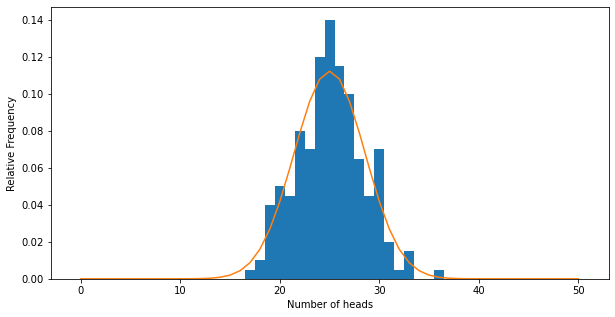

In [7]:
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
#ax2 = fig1.add_subplot(122)
fig1.canvas.draw()

nheads_exp = []
ntests = 200
nflips = 50

p = .5
x = np.array(range(nflips+1))
align='mid'
if nflips%2==0:
    align='left'
for i in range(ntests):
    iheads = get_nheads(nflips)
    nheads_exp.append(iheads)

    ax1.clear()
    ax1.hist(nheads_exp, range=(0,nflips+1), bins = nflips+1, density=True, align=align)
    ax1.plot(x, binom.pmf(x, nflips, p))
    ax1.set_ylabel("Relative Frequency")
    ax1.set_xlabel("Number of heads")
    fig1.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.03)


How do you think the mean and variance of this distribution compares with our ideal case?

In [8]:
print("mean = ",np.mean(nheads_exp))
print("std. dev. = ",np.std(nheads_exp))

mean =  25.09
std. dev. =  3.3811092854269


In [9]:
true_mean = nflips*1/2
print("True mean = ",true_mean)
true_std = np.sqrt(nflips*1/2*(1-1/2))
print("True std = ",true_std)

True mean =  25.0
True std =  3.5355339059327378


How different is our experimental result for the mean and standard deviation from what we expect?

In [10]:
mean_diff = np.abs(np.mean(nheads_exp) - true_mean)
std_diff = np.abs(np.std(nheads_exp) - true_std)
print("The difference between the true and experimental mean and standard deviations are:")
print("{:.3f} and {:.3f}".format(mean_diff,std_diff))

print("The percent differences are:")
print("{:.3f} and {:.3f}".format(mean_diff/true_mean,std_diff/true_std))

The difference between the true and experimental mean and standard deviations are:
0.090 and 0.154
The percent differences are:
0.004 and 0.044


## Judging the fairness of a coin

Now how can we determine if a coin is fair?

In [11]:
def get_nheads_weighted(nflips, weight):
    nheads = 0
    for i in range(nflips):
        if np.random.random() > weight:
            nheads += 1
    return nheads

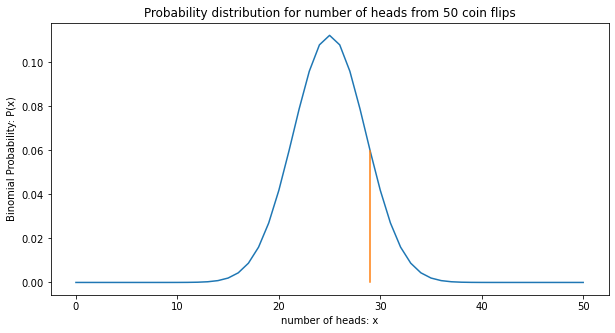

Fair coin: ave. nheads = 25.0, sigma = 3.536
Nheads between 17 and 32 have a Prob. to be fair of 0.960

 Number of heads = 29 

 Our flip is 1.13 sigma from the fair mean. 



In [12]:
fairness_weight = 0.40

nflips = 50

nheads = get_nheads_weighted(nflips, fairness_weight)

p = .5
x = np.array(range(nflips+1))

fig1 = plt.figure(1, figsize=(10,5))
plt.plot(x, binom.pmf(x, nflips, p))
plt.plot([nheads,nheads], [0,  binom.pmf(nheads, nflips, p)])
plt.title("Probability distribution for number of heads from 50 coin flips")
plt.ylabel("Binomial Probability: P(x)")
plt.xlabel("number of heads: x")
plt.show()

fair_mean = nflips*p
fair_sigma = np.sqrt(fair_mean*(1-p))

lowx = int(fair_mean-2*fair_sigma)
highx = int(fair_mean+2*fair_sigma)

bsum = 0
for x in range(lowx, highx):
    bsum += binom.pmf(x, nflips, p)

print("Fair coin: ave. nheads = {}, sigma = {:.3f}".format(fair_mean,fair_sigma))
print("Nheads between {} and {} have a Prob. to be fair of {:.3f}".format(lowx,highx,bsum))
print("")
print('\033[1m Number of heads = {} \033[0m'.format(nheads))
print("")
print("\033[1m\033[95m Our flip is {:.2f} sigma from the fair mean. \033[0m".format(np.abs(fair_mean-nheads)/fair_sigma))
print("")


## Running many tests

What if we tried running this test of our coin many times? 

Can we do a better job testing our coin this way?

In [13]:
def get_tests(ntests, nflips):
    nheads_exp = []
    for i in range(ntests):
        iheads = get_nheads(nflips)
        nheads_exp.append(iheads)

    return nheads_exp

In [14]:
def get_weighted_tests(ntests, nflips, weight):
    nheads_exp = []
    for i in range(ntests):
        iheads = get_nheads_weighted(nflips, weight)
        nheads_exp.append(iheads)

    return nheads_exp

 Fair coin: mean number of heads = 25.0, sigma = 3.54 
 Weighted coin: mean number of heads = 30.16, sigma_e = 3.78 


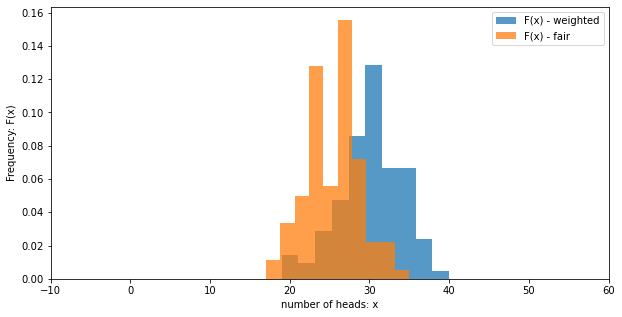

In [15]:
fairness_weight = 0.4

nflips = 50
ntests = 100

nheads = get_weighted_tests(ntests, nflips, fairness_weight)
nheads_f = get_tests(ntests, nflips)

p = .5
x = np.array(range(nflips+1))
fig1 = plt.figure(1, figsize=(10,5))
plt.hist(nheads,density=True, label="F(x) - weighted", alpha = 0.75)
plt.hist(nheads_f,density=True, label="F(x) - fair", alpha = 0.75)
#plt.plot(x, binom.pmf(x, nflips, p), label="P(x)")
plt.ylabel("Frequency: F(x)")
plt.xlabel("number of heads: x")
plt.xlim(int(fair_mean-10*fair_sigma),int(fair_mean+10*fair_sigma))
plt.legend()

fair_mean = nflips*p
fair_sigma = np.sqrt(fair_mean*(1-p))

print("\033[1m Fair coin: mean number of heads = {:.1f}, sigma = {:.2f} \033[0m".format(fair_mean,fair_sigma))
print("\033[1m Weighted coin: mean number of heads = {:.2f}, sigma_e = {:.2f} \033[0m".format(np.mean(nheads),np.std(nheads)))
plt.show()



## Running many experiments (each experiment being many tests)

What does the distribution of the means look like? Can we state the uncertainty on the mean, and can that tell us if a coin is fair or not?


 Mean of the mean number of heads = 25.04 +/- 0.39 


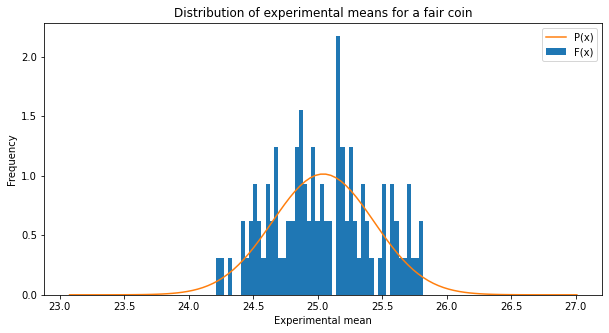

In [16]:
ntests = 100
nflips = 50
test_means = []
nexperiments = 100

for i in range(nexperiments):
    nheads_exp = get_tests(ntests, nflips)
    test_means.append(np.mean(nheads_exp))

mu = np.mean(test_means)
sigma = np.std(test_means)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)

print("\033[1m Mean of the mean number of heads = {:.2f} +/- {:.2f} \033[0m".format(mu,sigma))

fig1 = plt.figure(1, figsize=(10,5))
plt.hist(test_means, bins = nflips, density=True, label="F(x)")
plt.plot(x,y, label="P(x)")
plt.title("Distribution of experimental means for a fair coin")
plt.ylabel("Frequency")
plt.xlabel("Experimental mean")
plt.legend()
plt.show()


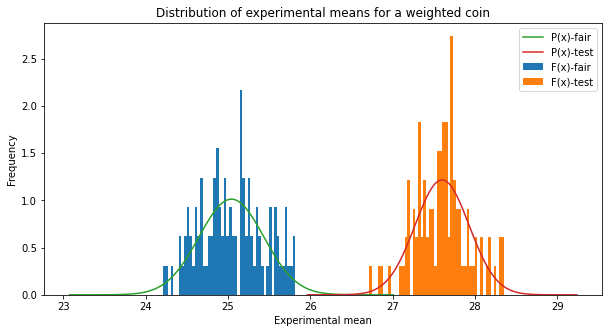

 Mean of the mean number of heads = 27.60 +/- 0.33 


In [17]:
ntests = 100
nflips = 50
wtest_means = []
nexperiments = 100

weight = 0.45

for i in range(nexperiments):
    nheads_exp = get_weighted_tests(ntests, nflips, weight)
    wtest_means.append(np.mean(nheads_exp))


wmu = np.mean(wtest_means)
wsigma = np.std(wtest_means)
wx = np.linspace(wmu - 5*wsigma, wmu + 5*wsigma, 100)
wy=norm.pdf(wx, wmu, wsigma)
fig1 = plt.figure(1, figsize=(10,5))
plt.hist(test_means, bins = nflips, density=True, label="F(x)-fair")
plt.hist(wtest_means, bins = nflips, density=True, label="F(x)-test")
plt.plot(x,y, label="P(x)-fair")
plt.plot(wx,wy, label="P(x)-test")
plt.title("Distribution of experimental means for a weighted coin")
plt.ylabel("Frequency")
plt.xlabel("Experimental mean")
plt.legend()
plt.show()

print("\033[1m Mean of the mean number of heads = {:.2f} +/- {:.2f} \033[0m".format(wmu,wsigma))


In [18]:
separation = np.abs(mu - wmu)/sigma
print("\033[1m The two distributions differ by {:.2f} sigma.\033[0m".format(separation))

 The two distributions differ by 6.51 sigma.


### Question from class:

**Can't we just flip the coin more times and learn the same thing?**

**Answer:** Yes, in this simple example we can. We can see how this works with an example.



In [25]:
def get_binom(prob, N):
    x = N*prob
    sig = np.sqrt(N*prob*(1-prob))
    return x,sig

In [30]:
N = 50
fair = get_binom(0.5,N)
weight = get_binom(0.4,N)
print("The fair coin would have a mean of {} and sigma of {:.2f}.".format(fair[0],fair[1]))
print("The weighted coin would have a mean of {} and sigma of {:.2f}.".format(weight[0],weight[1]))
sep = (fair[0] - weight[0])/fair[1]
print("They differ by {:.2f} sigma.".format(sep))

The fair coin would have a mean of 25.0 and sigma of 3.54.
The weighted coin would have a mean of 20.0 and sigma of 3.46.
They differ by 1.41 sigma.


This was what we saw before, we can't really say that the weighted coin is unlikely to be fair with a high probability after 50 coin flips. There would be a >5% probability that the weighted coin is fair if we got these results experimentally.

What if we just toss the coin 5000 times?

In [31]:
N = 5000
fair = get_binom(0.5,N)
weight = get_binom(0.4,N)
print("The fair coin would have a mean of {} and sigma of {:.2f}.".format(fair[0],fair[1]))
print("The weighted coin would have a mean of {} and sigma of {:.2f}.".format(weight[0],weight[1]))
sep = (fair[0] - weight[0])/fair[1]
print("They differ by {:.2f} sigma.".format(sep))

The fair coin would have a mean of 2500.0 and sigma of 35.36.
The weighted coin would have a mean of 2000.0 and sigma of 34.64.
They differ by 14.14 sigma.


Now the two coins would clearly differ by many sigma in almost all experiments! So we even run many experiments?

This simple coin-flip example is just to illustrate this much more fundamental property that measured parameters (mean and sigma) of a probability distribution will tend towards a Gaussian distribution will a well defined uncertainty the more we sample from them.